In [4]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from two_layer_net import TwoLayerNet

(784, 100)
(100,)
(100, 10)
(10,)


In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [6]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [7]:
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

In [8]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [9]:
iter_per_epoch = max(train_size / batch_size, 1)

In [10]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.7970833333333334, 0.8019
train acc, test acc | 0.8782, 0.8818
train acc, test acc | 0.8982166666666667, 0.9012
train acc, test acc | 0.9071333333333333, 0.9097
train acc, test acc | 0.9140666666666667, 0.9136
train acc, test acc | 0.9180666666666667, 0.9193
train acc, test acc | 0.92315, 0.923
train acc, test acc | 0.9255166666666667, 0.9259
train acc, test acc | 0.9296166666666666, 0.9313
train acc, test acc | 0.93315, 0.9345
train acc, test acc | 0.9353666666666667, 0.9351
train acc, test acc | 0.9378833333333333, 0.9376
train acc, test acc | 0.93995, 0.9393
train acc, test acc | 0.9428666666666666, 0.9424
train acc, test acc | 0.9451, 0.9437
train acc, test acc | 0.9465166666666667, 0.9452


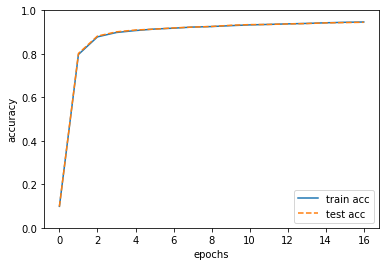

In [11]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()